In [1]:
import os
os.sys.path.append("..")

from src.datamodules.H5datasets import NIHDataset,VinbigDataset,MIMICDataset
from CheXzero.train import CXRDataset
from torchvision.transforms import Compose, Normalize, Resize, InterpolationMode
input_resolution = 224
transform = Compose([
    Normalize((101.48761, 101.48761, 101.48761), (83.43944, 83.43944, 83.43944)),
    Resize(input_resolution, interpolation=InterpolationMode.BICUBIC),
])

In [2]:
cxr_filepath = "/data/h5/mimic/cxr.h5"
file_path = "/data/h5/mimic/cxr_paths.csv"
txt_filepath = "/data/h5/mimic/mimic_impressions.csv"
column='impression'

m_d_2 = MIMICDataset(img_path=cxr_filepath,file_path=file_path,
                        txt_path=txt_filepath, column=column, transform=transform)
for x in m_d_2:
    pass

In [3]:
cxr_filepath = "/data/h5/nih/cxr.h5"
file_path = "/data/h5/nih/cxr_paths.csv"
csv_path = "/data/nih_raw/Data_Entry_2017_v2020.csv"
bbox_path = "/data/nih_raw/BBox_List_2017.csv"

m_d_1 = NIHDataset(img_path=cxr_filepath,file_path=file_path,
                        csv_path=csv_path,bbox_path=bbox_path, transform=transform)
for x in m_d_1:
    pass

../src/datamodules/H5datasets.py:159: FutureWarning: The default value of regex will change from True to False in a future version.
  key = row.str.replace(".png", "")


In [4]:
cxr_filepath = "/data/h5/vinbig/cxr_train.h5"
file_path = "/data/h5/vinbig/cxr_paths_train.csv"
csv_path = "/data/vinbig/train.csv"

m_d = VinbigDataset(img_path=cxr_filepath,file_path=file_path,
                        csv_path=csv_path, transform=transform)
for x in m_d:
    pass

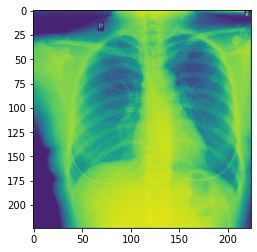

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x['img'][2])

In [133]:
from PIL import Image
resolution=320
def preprocess(img, desired_size=320):
    old_size = img.size
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    img = img.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_img = Image.new('L', (desired_size, desired_size))
    new_img.paste(img, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
    return new_img

try:
    import pydicom
except ImportError as e:
    raise Exception("Please install pydicom to work with this dataset")
from pydicom.pixel_data_handlers.util import apply_modality_lut
dicom_obj = pydicom.filereader.dcmread(m_d.file_path[0])
img = apply_modality_lut(dicom_obj.pixel_array, dicom_obj)
img = pydicom.pixel_data_handlers.apply_windowing(img, dicom_obj)

# Photometric Interpretation to see if the image needs to be inverted
mode = dicom_obj[0x28, 0x04].value
bitdepth = dicom_obj[0x28, 0x101].value

# hack!
if img.max() < 256:
    bitdepth = 8

if mode == "MONOCHROME1":
    img = -1 * img + 2**float(bitdepth)
elif mode == "MONOCHROME2":
    pass
else:
    raise Exception("Unknown Photometric Interpretation mode")
#img_pil = Image.fromarray(img)
# preprocess
import cv2
img = cv2.resize(img,(resolution, resolution),
                              interpolation=cv2.INTER_AREA
                              ).astype(np.float32)

In [134]:
import numpy as np
img_normalized = (2 * (img.astype(np.float32) / 2**float(bitdepth)) - 1) * 83.43944
#img_pil = Image.fromarray(img_normalized)
#img_normalized = preprocess(img_pil, desired_size=resolution)     


/tmp/ipykernel_216517/1392139653.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = transform(torch.tensor(img))


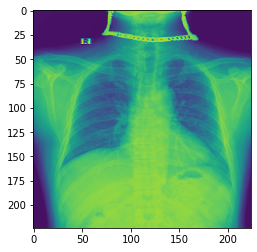

In [135]:
import torch
img = np.expand_dims(img_normalized, axis=0)
img = np.repeat(img, 3, axis=0)

img = torch.from_numpy(img) # torch, (3, 320, 320)
a = transform(torch.tensor(img))
plt.imshow(a[0])

In [106]:
m_d_1[0]['img']

tensor([[[ 1.1089,  1.0316,  0.8717,  ..., -1.1567, -1.1549, -1.1758],
         [ 1.0044,  0.8667,  0.2376,  ..., -1.1649, -1.1540, -1.1758],
         [ 0.8056,  0.2348, -0.5810,  ..., -1.1689, -1.1536, -1.1758],
         ...,
         [ 1.8245,  1.5575,  0.9866,  ..., -1.2117, -1.2162, -1.2163],
         [ 1.8285,  1.5688,  0.9810,  ..., -1.1786, -1.2195, -1.2163],
         [ 1.8343,  1.5873,  0.9736,  ..., -1.0596, -1.2320, -1.2163]],

        [[ 1.1089,  1.0316,  0.8717,  ..., -1.1567, -1.1549, -1.1758],
         [ 1.0044,  0.8667,  0.2376,  ..., -1.1649, -1.1540, -1.1758],
         [ 0.8056,  0.2348, -0.5810,  ..., -1.1689, -1.1536, -1.1758],
         ...,
         [ 1.8245,  1.5575,  0.9866,  ..., -1.2117, -1.2162, -1.2163],
         [ 1.8285,  1.5688,  0.9810,  ..., -1.1786, -1.2195, -1.2163],
         [ 1.8343,  1.5873,  0.9736,  ..., -1.0596, -1.2320, -1.2163]],

        [[ 1.1089,  1.0316,  0.8717,  ..., -1.1567, -1.1549, -1.1758],
         [ 1.0044,  0.8667,  0.2376,  ..., -1